# Générer des cartes de vœux avec Pandas

__Contexte et objectif:__ 

Vous avez une idée de start-up : vendre des cartes de vœux pour les anniversaires, en faisant un type de cartes pour le jour de la semaine de naissance du destinataire. Vous aurez ainsi 7 types de cartes différents. Il est nécessaire de prévoir la quantité de cartes à créer pour pouvoir les commander chaque jour.

__Les données:__

Jeu de données des naissance aux États-Unis établi en juin 2015 https://github.com/jakevdp/data-CDCbirths 
- obtenu depuis les centres de contrôle des maladies et de prévention des USA / "the USA Centers for Disease Control and Prevention": http://www.cdc.gov/nchs/data_access/Vitalstatsonline.htm
- compilé via Google's BigQuery Web UI: https://cloud.google.com/bigquery/bigquery-web-ui


__Consigne:__
- Pour comprendre quelles cartes créer, vous allez donc étudier les jours de naissance des habitants des états-unis.
- Nettoyer les données: avec un peu d’algèbre linéaire, traitement avec la fonction to_datetime pour transformer les données en objets datetime.

__Livrable:__
- Un graphique avec trois courbes qui représentent le nombre de naissances pour chaque jour de la semaine pour les décennies 1960, 1970 et 1980.

## 1. Découverte du jeu de donnée

In [477]:
# import de toutes les bibliothèques nécessaires
import pandas as pd
import numpy as np

In [478]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [479]:
births.shape

(15547, 5)

In [480]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
year      15547 non-null int64
month     15547 non-null int64
day       15067 non-null float64
gender    15547 non-null object
births    15547 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


- les années 60 ne sont pas complète vu que les données commence pour 1969
- les nombes des colonnes sont explicites
- les années, mois et jours sont décomposés en 3 colonnes et ne sont pas dans le format de date sous python (datetime object)
- seule la colonne "day" comporte des valeurs nulles à nettoyer
- la colonne "day" comprend des nombres flottants à convertir en integer
- il va falloir fusionner les lignes avec les naissances "femme" et "homme" car nous ne faisons pas la disctinction 

In [481]:
births['year'].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [482]:
births['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [483]:
births['day'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99., nan])

- les années vont de 1969 à 2008, mais nous nous interresons aux décennies 60, 70 et 80
- il y a des jours avec des valeurs non cohérentes : 99

## 2. Nettoyage et préparation du jeu de données

In [484]:
# ou se trouvent les valeurs manquantes
births[births['day'].isnull()][0:24]

,year,month,day,gender,births
15067,1989,1,NaN,F,156749
15068,1989,1,NaN,M,164052
15069,1989,2,NaN,F,146710
15070,1989,2,NaN,M,154047
15071,1989,3,NaN,F,165889
15072,1989,3,NaN,M,174433
15073,1989,4,NaN,F,155689
15074,1989,4,NaN,M,163432
15075,1989,5,NaN,F,163800
15076,1989,5,NaN,M,172892


L'année 1989 ne contient que des valeurs manquantes, ces lignes vont être supprimées et nous n'aurons pas de donnée pour cette année !

In [485]:
# enlève les valeurs manquantes
births = births.dropna(axis=0)

In [486]:
# enlève les valeurs incohérentes
births = births[births['day'] != 99]

# convertir les jours en entier
births['day'] = births['day'].astype(int)

In [487]:
# vérification
births['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [488]:
# enlève les années qui ne nous interessent pas, pour alléger le jeu de données
births = births[births['year'] < 1990]

# vérification
births['year'].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988], dtype=int64)

In [489]:
births[(births['month'] == 2) & (births['day'] > 28)].head()

,year,month,day,gender,births
120,1969,2,29,F,50
121,1969,2,29,M,16
122,1969,2,30,F,24
123,1969,2,30,M,28
124,1969,2,31,F,24


Il y a des valeurs incohérentes: par exemple des jours de février > 28!

In [490]:
# on enlève ces valeurs incohérentes
d_list = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
for i in (range(1, 13)):
    births.drop(births[(births['month'] == i) & (births['day'] > d_list[i-1])].index, inplace=True)

In [491]:
# creation d'une colone "date" avec Y/M/D
births['date'] = pd.to_datetime(births[['year', 'month', 'day']])
births.head()

,year,month,day,gender,births,date
0,1969,1,1,F,4046,1969-01-01
1,1969,1,1,M,4440,1969-01-01
2,1969,1,2,F,4454,1969-01-02
3,1969,1,2,M,4548,1969-01-02
4,1969,1,3,F,4548,1969-01-03


### Aggrégation des nombres de naissance indépendament des genres - 1ère solution

In [492]:
# aggrège les nbre de naissances en faisant la somme pour les 2 genres
births_test = births.groupby('date').agg('sum')
births_test.tail()

,year,month,day,births
date,,,,
1988-12-27,3976,24,54,11528
1988-12-28,3976,24,56,11847
1988-12-29,3976,24,58,11704
1988-12-30,3976,24,60,11837
1988-12-31,3976,24,62,9133


In [493]:
#births_test.columns = births_test.columns.droplevel(0)
#births_test.columns = ["_".join(x) for x in births_test.columns.ravel()]
#births_test.head()

lors de l'aggrégation les valeurs des colonnes year...day ont été multipliées par 2

births_test = births['year'] / 2

https://www.datacamp.com/community/tutorials/pandas-multi-index

### Aggrégation des nombres de naissance indépendament des genres - 2ème solution

In [494]:
# séparation en 2 dataframes
births_f = births[births['gender'] == 'F']
births_m = births[births['gender'] == 'M']

# renomme les colonnes des naissances
births_m = births_m.rename({'year':'year_m', 'month':'month_m', 'day':'day_m', 'gender':'gender_m', 'births':'births_m'}, axis='columns')
births_f = births_f.rename({'year':'year_f', 'month':'month_f', 'day':'day_f', 'gender':'gender_f', 'births':'births_f'}, axis='columns')

births_f.head()

,year_f,month_f,day_f,gender_f,births_f,date
0,1969,1,1,F,4046,1969-01-01
2,1969,1,2,F,4454,1969-01-02
4,1969,1,3,F,4548,1969-01-03
6,1969,1,4,F,4440,1969-01-04
8,1969,1,5,F,4192,1969-01-05


In [495]:
#print(births_f.shape, births_m.shape)

In [496]:
# refait les indexes des 2 df et enlève l'ancienne colonne index
births_f.reset_index(inplace=True)
births_f.drop(columns=['index'], inplace=True)
#print(births_f.shape)

births_m.reset_index(inplace=True)
births_m.drop(columns=['index'], inplace=True)
#print(births_m.shape)

In [497]:
birth_test2 = pd.concat([births_f, births_m], axis = 1)
birth_test2.tail()

,year_f,month_f,day_f,gender_f,births_f,date,year_m,month_m,day_m,gender_m,births_m,date
7295,1988,12,27,F,5633,1988-12-27,1988,12,27,M,5895,1988-12-27
7296,1988,12,28,F,5858,1988-12-28,1988,12,28,M,5989,1988-12-28
7297,1988,12,29,F,5760,1988-12-29,1988,12,29,M,5944,1988-12-29
7298,1988,12,30,F,5742,1988-12-30,1988,12,30,M,6095,1988-12-30
7299,1988,12,31,F,4435,1988-12-31,1988,12,31,M,4698,1988-12-31


In [498]:
# ajout des naissances M/F dans une nouvelle colonne
birth_test2['births'] = birth_test2['births_f'] + birth_test2['births_m']

# nettoyage
birth_test2.drop(columns=['gender_f', 'date', 'year_m', 'month_m', 'day_m', 'gender_m', 'births_f', 'births_m'], inplace=True)
birth_test2 = birth_test2.rename({'year_f':'year', 'month_f':'month', 'day_f':'day'}, axis='columns')

# recréation de la date
birth_test2['date'] = pd.to_datetime(birth_test2[['year', 'month', 'day']])

birth_test2.tail()

,year,month,day,births,date
7295,1988,12,27,11528,1988-12-27
7296,1988,12,28,11847,1988-12-28
7297,1988,12,29,11704,1988-12-29
7298,1988,12,30,11837,1988-12-30
7299,1988,12,31,9133,1988-12-31


In [499]:
birth_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 5 columns):
year      7300 non-null int64
month     7300 non-null int64
day       7300 non-null int32
births    7300 non-null int64
date      7300 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(3)
memory usage: 256.7 KB


## 3. Analyse du jeu de données & visualisation graphique

In [500]:
births = birth_test2

In [501]:
# découpage en 3 df en fonction des décennies qui nous interesse
births_60 = births[births['year'] < 1970]
births_70 = births[(births['year'] >= 1970) & (births['year'] < 1980)]
births_80 = births[(births['year'] >= 1980) & (births['year'] < 1990)]

##### Afin de pouvoir anticiper le nombre de cartes à produire, voici quelques statistiques pour donner des ordres de grandeur des naissances journalières

In [502]:
print("Statistiques du nombre de naissances pour les années 60:")
births_60['births'].describe().iloc[1:7].astype(int)

Statistiques du nombre de naissances pour les années 60:


mean     9859
std       769
min      7928
25%      9332
50%      9910
75%     10450
Name: births, dtype: int32

In [503]:
print("Statistiques du nombre de naissances pour les années 70:")
births_70['births'].describe().iloc[1:7].astype(int)

Statistiques du nombre de naissances pour les années 70:


mean    9140
std      946
min     6675
25%     8532
50%     9172
75%     9766
Name: births, dtype: int32

In [504]:
print("Statistiques du nombre de naissances pour les années 80:")
births_80['births'].describe().iloc[1:7].astype(int)

Statistiques du nombre de naissances pour les années 80:


mean    10191
std      1085
min      7645
25%      9203
50%     10388
75%     11012
Name: births, dtype: int32

In [505]:
print("Nombre de naissances journalières en moyenne par mois pour les années 60:")
births_60.groupby('month').mean()['births'].astype(int)

Nombre de naissances journalières en moyenne par mois pour les années 60:


month
1      9479
2      9661
3      9562
4      9415
5      9323
6      9714
7     10267
8     10352
9     10414
10    10060
11     9894
12    10142
Name: births, dtype: int32

In [506]:
print("Nombre de naissances journalières en moyenne par mois pour les années 70:")
births_70.groupby('month').mean()['births'].astype(int)

Nombre de naissances journalières en moyenne par mois pour les années 70:


month
1     8909
2     9062
3     8987
4     8696
5     8756
6     8987
7     9443
8     9636
9     9783
10    9285
11    9051
12    9073
Name: births, dtype: int32

In [507]:
print("Nombre de naissances journalières en moyenne par mois pour les années 80:")
births_80.groupby('month').mean()['births'].astype(int)

Nombre de naissances journalières en moyenne par mois pour les années 80:


month
1      9688
2      9953
3      9983
4      9886
5      9969
6     10262
7     10661
8     10757
9     10957
10    10268
11     9937
12     9954
Name: births, dtype: int32

##### Visualisation de différents graphes

In [508]:
# import de toutes les bibliothèques nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

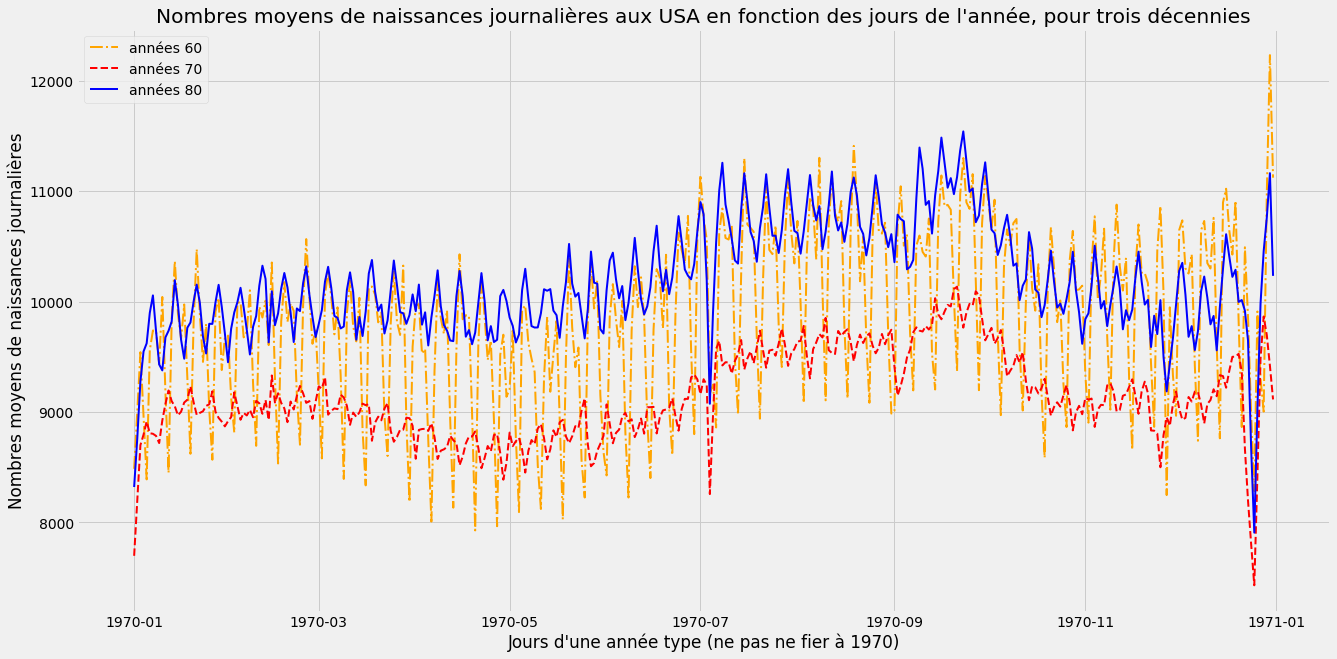

In [509]:
plt.rcParams.update({'font.size': 12})      # change la taille de police par défaut
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,10))     # augmente la taille pour une meilleure visibilité
ax = plt.axes()


# affichage des graphes - on prend la même année 70 de référence pour l'axe des x pour les 3
plt.plot(births_70[births_70['year'] == 1970]['date'],
         births_60.groupby(['month', 'day']).mean()['births'].astype(int),
         color='orange', linestyle='dashdot', label='années 60', linewidth=2.0)

plt.plot(births_70[births_70['year'] == 1970]['date'], 
         births_70.groupby(['month', 'day']).mean()['births'].astype(int), 
         color='red', linestyle='dashed', label='années 70', linewidth=2.0)

plt.plot(births_70[births_70['year'] == 1970]['date'], 
         births_80.groupby(['month', 'day']).mean()['births'].astype(int), 
         color='blue', linestyle='solid', label='années 80', linewidth=2.0)

# Ajout d'un titre
plt.title("Nombres moyens de naissances journalières aux USA en fonction des jours de l'année, pour trois décennies")

# Labels pour les axes
ax = ax.set(xlabel="Jours d'une année type (ne pas ne fier à 1970)", ylabel='Nombres moyens de naissances journalières')

# La légende est générée à partir de l'argument label de la fonction
plt.legend(loc='upper left');

### Constations :    
* __Il y a plus de "bruit" pour les années 60 ou plus de microvariations, ce qui s'explique par le fait qu'il n'y ait qu'une année (1969) dans le jeu de données et qu'il n'y a pas eu de moyenne de fait pour "lisser" la courbe__ 

* __Globalement les tendances au cours de l'année se retrouvent dans les 3 décennies__

### Graphique avec trois courbes qui représentent le nombre de naissances pour chaque jour de la semaine pour les décennies 1960, 1970 et 1980

Quelques tests sur les dates...

In [510]:
test1 = births_60['date'].iloc[0]
test1

Timestamp('1969-01-01 00:00:00')

In [511]:
test1 = test1.to_pydatetime()
test1

datetime.datetime(1969, 1, 1, 0, 0)

In [512]:
import datetime
test1.strftime("%A")

'Wednesday'

In [513]:
# désactive les warnings non justifiés
pd.set_option('mode.chained_assignment', None)

# ajout de colonnes avec le nom du jour dans chaque df
births_60['weekday'] = births_60['date'].dt.day_name()
births_70['weekday'] = births_70['date'].dt.day_name()
births_80['weekday'] = births_80['date'].dt.day_name()
births_60.head()

,year,month,day,births,date,weekday
0,1969,1,1,8486,1969-01-01,Wednesday
1,1969,1,2,9002,1969-01-02,Thursday
2,1969,1,3,9542,1969-01-03,Friday
3,1969,1,4,8960,1969-01-04,Saturday
4,1969,1,5,8390,1969-01-05,Sunday


In [514]:
births_60.groupby('weekday').mean()['births'].astype(int)

weekday
Friday       10215
Monday       10127
Saturday      9302
Sunday        8684
Thursday      9956
Tuesday      10572
Wednesday    10149
Name: births, dtype: int32

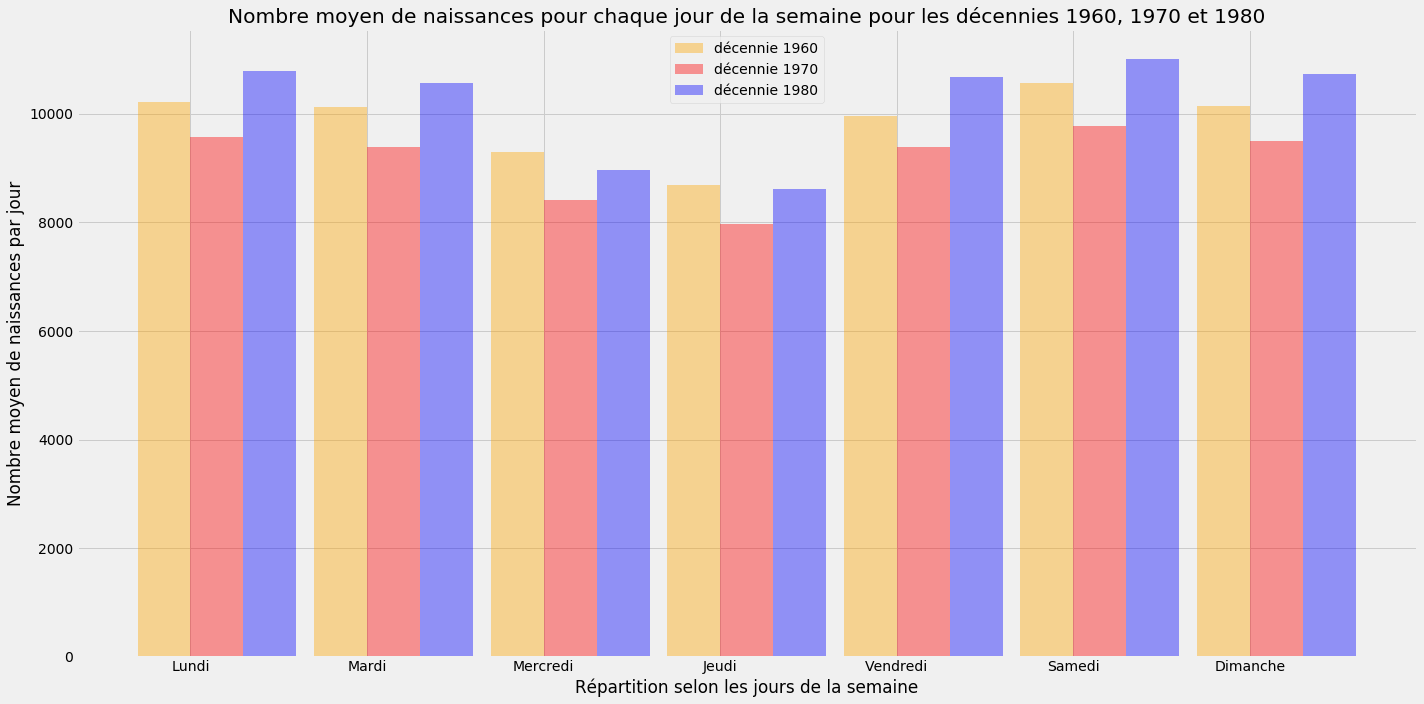

In [515]:
nb_days = 7

fig = plt.figure(figsize=(20,10)) 
index = np.arange(nb_days)
bar_width = 0.30
opacity = 0.4

rects1 = plt.bar(index, births_60.groupby('weekday').mean()['births'].astype(int), bar_width,
                 alpha=opacity,
                 color='orange',
                 label='décennie 1960')

rects2 = plt.bar(index + bar_width, births_70.groupby('weekday').mean()['births'].astype(int), bar_width,
                 alpha=opacity,
                 color='red',
                 label='décennie 1970')

rects3 = plt.bar(index + bar_width*2, births_80.groupby('weekday').mean()['births'].astype(int), bar_width,
                 alpha=opacity,
                 color='blue',
                 label='décennie 1980')

plt.xlabel('Répartition selon les jours de la semaine')
plt.ylabel('Nombre moyen de naissances par jour')
plt.title('Nombre moyen de naissances pour chaque jour de la semaine pour les décennies 1960, 1970 et 1980')
plt.xticks(index + bar_width / 2, ('Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'))
plt.legend()

plt.tight_layout()
plt.show()

##### Le graphique montre que la tendance serait à plus de naissance vers la fin de semaine qu'au milieu.
##### Les différences entres les 3 décennies se retrouvent sur ce graphe pour chaqun des jours de la semaine